Saving damaged car.webp to damaged car (1).webp


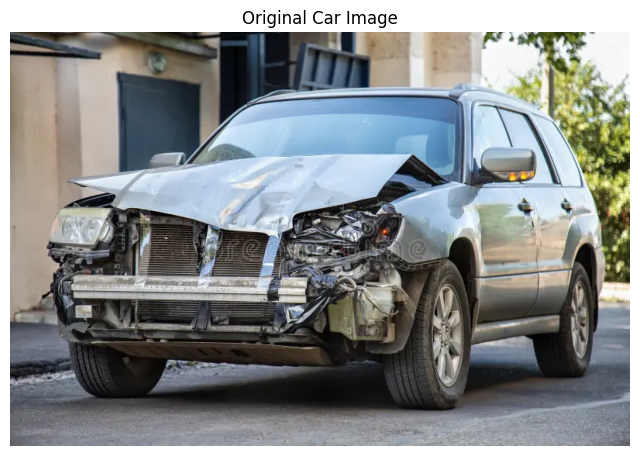

In [ ]:
from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import io

# Load the uploaded image
for fn in uploaded.keys():
    img_path = fn

# Open image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.title('Original Car Image')
plt.axis('off')
plt.show()

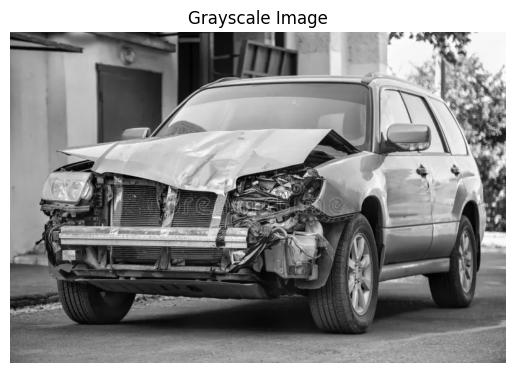

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Show
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

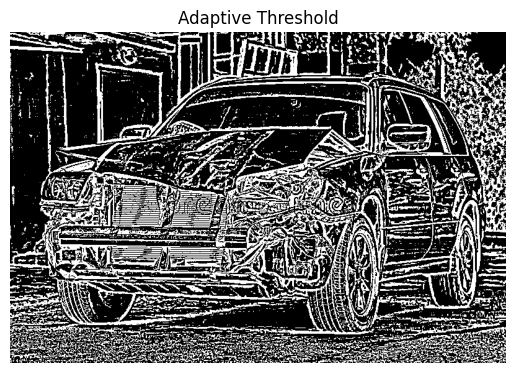

In [ ]:
# Apply adaptive threshold
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Show
plt.imshow(thresh, cmap='gray')
plt.title("Adaptive Threshold")
plt.axis('off')
plt.show()

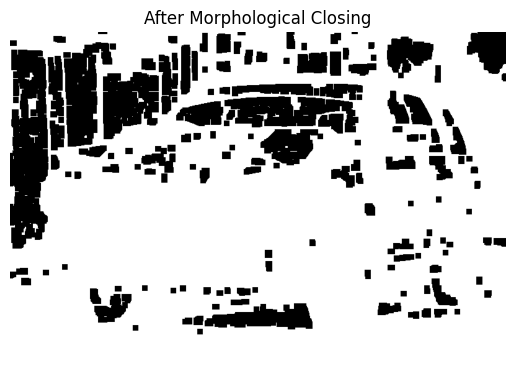

In [ ]:
import numpy as np

# Morphology closing
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

# Show
plt.imshow(morph, cmap='gray')
plt.title("After Morphological Closing")
plt.axis('off')
plt.show()

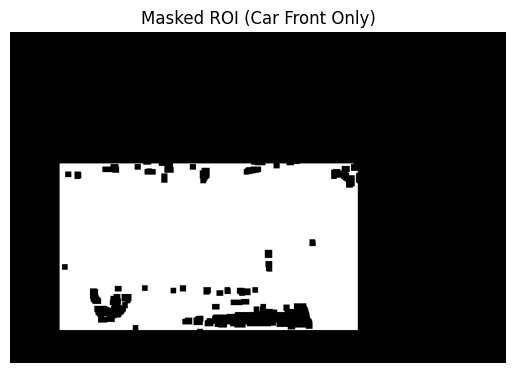

In [ ]:
# Create ROI mask
roi_mask = np.zeros_like(morph)
h, w = morph.shape

# Draw ROI rectangle
cv2.rectangle(roi_mask, (int(w * 0.1), int(h * 0.4)), (int(w * 0.7), int(h * 0.9)), 255, -1)

# Apply mask
masked = cv2.bitwise_and(morph, morph, mask=roi_mask)

# Show
plt.imshow(masked, cmap='gray')
plt.title("Masked ROI (Car Front Only)")
plt.axis('off')
plt.show()

In [ ]:
contours, _ = cv2.findContours(masked, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Contours found: {len(contours)}")

Contours found: 1


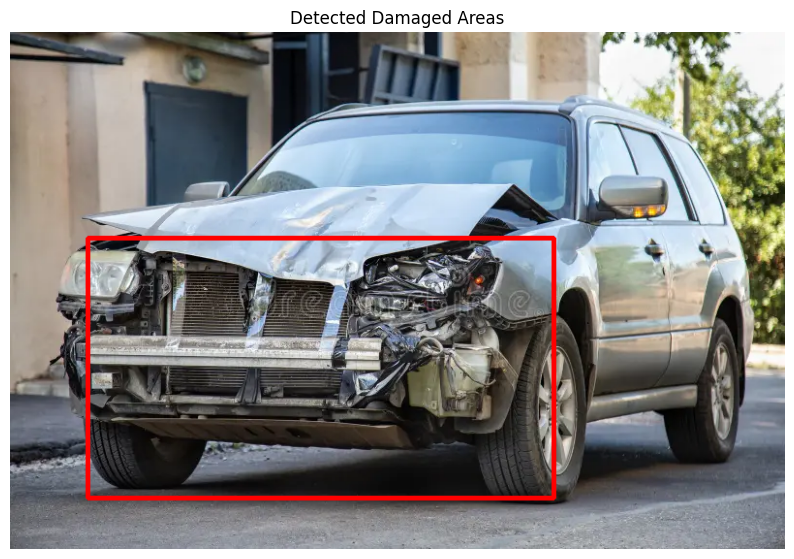

In [ ]:
img_result = img_rgb.copy()

for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1000:  # filter small detections
        x, y, w_box, h_box = cv2.boundingRect(cnt)
        if x + w_box < int(img.shape[1] * 0.75):
            cv2.rectangle(img_result, (x, y), (x + w_box, y + h_box), (255, 0, 0), 3)

plt.figure(figsize=(10, 7))
plt.imshow(img_result)
plt.title("Detected Damaged Areas")
plt.axis('off')
plt.show()

In [ ]:
# Total area of the ROI (car front)
total_roi_area = cv2.countNonZero(roi_mask)

# Total damaged area (all big contours added up)
damage_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 1000:  # same filter as before
        x, y, w_box, h_box = cv2.boundingRect(cnt)
        if x + w_box < int(img.shape[1] * 0.75):
            damage_area += area

# Calculate percentage
damage_percentage = (damage_area / total_roi_area) * 100
print(f"Estimated Damage Area: {damage_percentage:.2f}% of the car front")

Estimated Damage Area: 98.82% of the car front
